KORELASI ANTARA WAKTU PENILAIAN DAN SKOR, Dataset Assessments and studentAssesment, Frederick Huisand Sutirto(2020-156)

In [2]:
#LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# **ASSESSMENTS**

In [3]:
ass = pd.read_csv('assessments.csv')

ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [46]:
ass.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [4]:
print(ass.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None


In [5]:
ass.describe

<bound method NDFrame.describe of     code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight  
0      10.0  
1      20.0  
2      20.0  
3      20

In [6]:
ass.duplicated().sum()

0

In [7]:
missing_data = ass.isnull().sum()  # Menghitung jumlah data yang hilang di setiap kolom
print("Jumlah Data Hilang dalam Dataset Assessment:")
print(missing_data)

Jumlah Data Hilang dalam Dataset Assessment:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [8]:
ass.dropna(inplace=True)  # Menghapus baris yang memiliki nilai-nilai yang hilang

In [9]:
# Melihat statistik deskriptif
desc_stats = ass.describe()

print(desc_stats)

       id_assessment        date      weight
count     195.000000  195.000000  195.000000
mean    26851.056410  145.005128   16.410256
std      9830.992674   76.001119   24.505488
min      1752.000000   12.000000    0.000000
25%     24282.500000   71.000000    0.000000
50%     25367.000000  152.000000   10.000000
75%     34892.500000  222.000000   20.000000
max     37444.000000  261.000000  100.000000


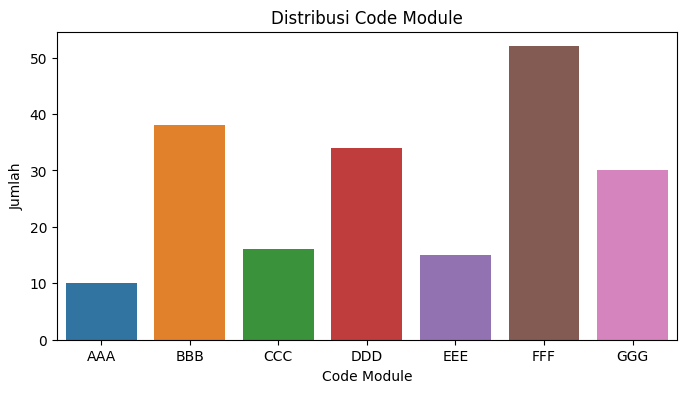

In [10]:
# Plot distribusi code_module
plt.figure(figsize=(8, 4))
sns.countplot(data=ass, x='code_module')
plt.title("Distribusi Code Module")
plt.xlabel("Code Module")
plt.ylabel("Jumlah")


# Tampilkan semua plot
plt.show()


Text(0, 0.5, 'Jumlah')

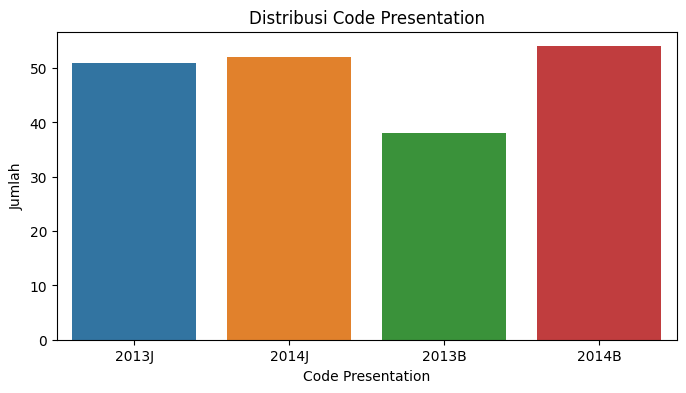

In [11]:
# Plot distribusi code_presentation
plt.figure(figsize=(8, 4))
sns.countplot(data=ass, x='code_presentation')
plt.title("Distribusi Code Presentation")
plt.xlabel("Code Presentation")
plt.ylabel("Jumlah")


Text(0, 0.5, 'Jumlah Penilaian')

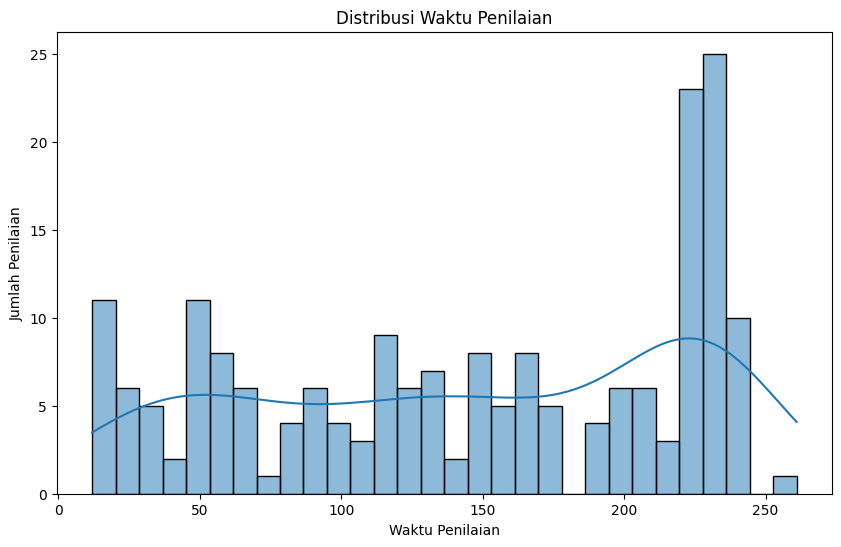

In [12]:
# Plot distribusi date
plt.figure(figsize=(10, 6))
sns.histplot(data=ass, x='date', bins=30, kde=True)
plt.title("Distribusi Waktu Penilaian")
plt.xlabel("Waktu Penilaian")
plt.ylabel("Jumlah Penilaian")


In [13]:
import pandas as pd

# Menghitung frekuensi penilaian berdasarkan tipe penilaian
assessment_counts = ass['assessment_type'].value_counts()

# Menghitung frekuensi penilaian berdasarkan tipe penilaian dan kode modul
assessment_counts_by_module = ass.groupby(['code_module', 'assessment_type']).size().unstack(fill_value=0)

# Menampilkan hasil analisis frekuensi
print("Frekuensi Penilaian Berdasarkan Tipe Penilaian:")
print(assessment_counts)
print("\nFrekuensi Penilaian Berdasarkan Kode Modul dan Tipe Penilaian:")
print(assessment_counts_by_module)

Frekuensi Penilaian Berdasarkan Tipe Penilaian:
TMA     106
CMA      76
Exam     13
Name: assessment_type, dtype: int64

Frekuensi Penilaian Berdasarkan Kode Modul dan Tipe Penilaian:
assessment_type  CMA  Exam  TMA
code_module                    
AAA                0     0   10
BBB               15     0   23
CCC                8     0    8
DDD                7     3   24
EEE                0     3   12
FFF               28     4   20
GGG               18     3    9


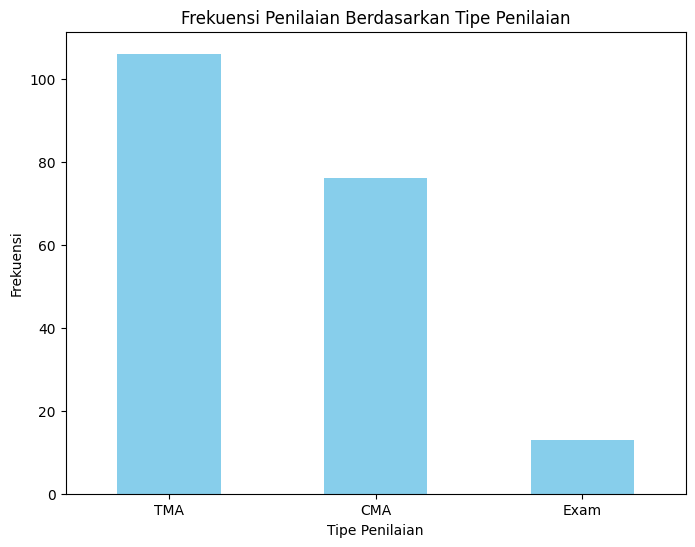

In [14]:
# Visualisasi frekuensi penilaian berdasarkan tipe penilaian
plt.figure(figsize=(8, 6))
assessment_counts.plot(kind='bar', color='skyblue')
plt.title("Frekuensi Penilaian Berdasarkan Tipe Penilaian")
plt.xlabel("Tipe Penilaian")
plt.ylabel("Frekuensi")
plt.xticks(rotation=0)
plt.show()

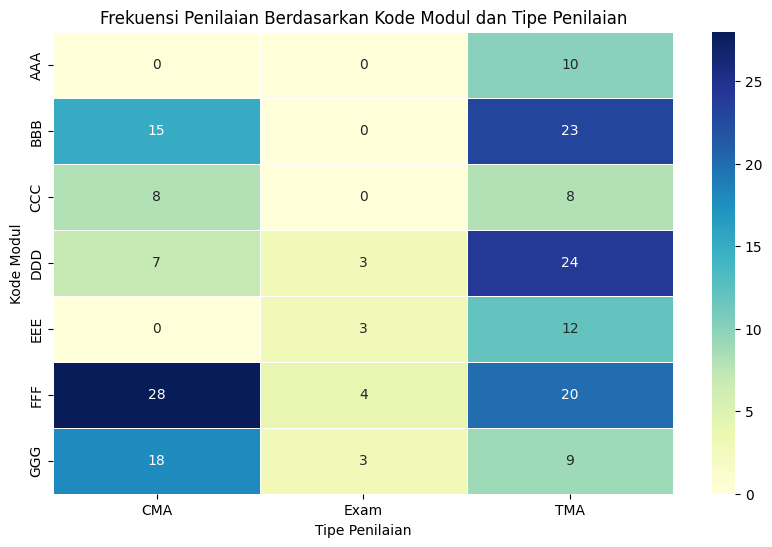

In [15]:
# Visualisasi frekuensi penilaian berdasarkan kode modul dan tipe penilaian
plt.figure(figsize=(10, 6))
sns.heatmap(data=assessment_counts_by_module, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Frekuensi Penilaian Berdasarkan Kode Modul dan Tipe Penilaian")
plt.xlabel("Tipe Penilaian")
plt.ylabel("Kode Modul")
plt.show()


# **STUDENT ASSESSMENT**

In [16]:
sa = pd.read_csv('studentAssessment.csv')

sa.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [17]:
sa.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [18]:
missing_data = sa.isnull().sum()  # Menghitung jumlah data yang hilang di setiap kolom
print("Jumlah Data Hilang dalam Dataset Assessment:")
print(missing_data)

Jumlah Data Hilang dalam Dataset Assessment:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [19]:
sa.dropna(inplace=True)  # Menghapus baris yang memiliki nilai-nilai yang hilang

In [20]:
sa.duplicated().sum()

0

In [21]:
print(sa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173739 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173739 non-null  int64  
 1   id_student      173739 non-null  int64  
 2   date_submitted  173739 non-null  int64  
 3   is_banked       173739 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 8.0 MB
None


In [22]:
print(sa.describe())

       id_assessment    id_student  date_submitted      is_banked  \
count  173739.000000  1.737390e+05   173739.000000  173739.000000   
mean    26555.615826  7.052474e+05      116.020226       0.010982   
std      8829.999907  5.524822e+05       71.479612       0.104218   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044660e+05       51.000000       0.000000   
50%     25359.000000  5.852220e+05      116.000000       0.000000   
75%     34883.000000  6.345000e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  


In [23]:
print(sa.value_counts())


id_assessment  id_student  date_submitted  is_banked  score
1752           11391       18              0          78.0     1
34871          1464952     213             0          76.0     1
               1097354     223             0          80.0     1
               1118284     207             0          94.0     1
               1337055     199             0          83.0     1
                                                              ..
24294          693182      207             0          52.0     1
               693204      207             0          59.0     1
               693302      199             0          88.0     1
               693747      207             0          73.0     1
37443          2648187     215             0          80.0     1
Length: 173739, dtype: int64


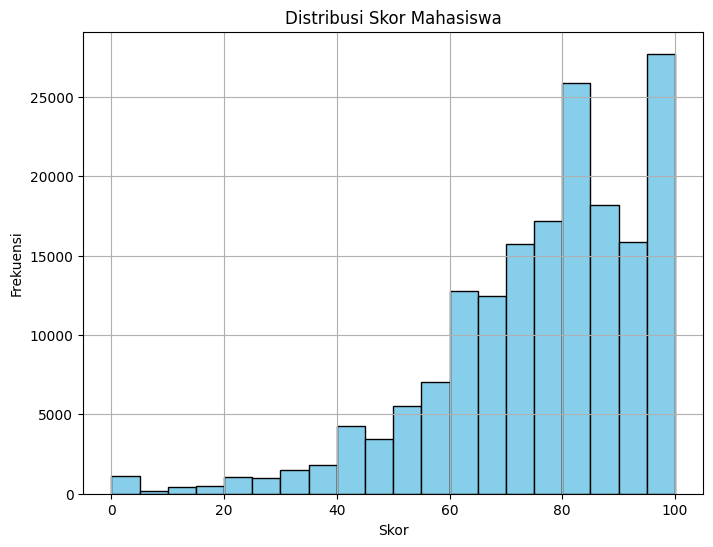

In [24]:
#  distribusi skor mahasiswa.
plt.figure(figsize=(8, 6))
plt.hist(sa['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Skor Mahasiswa')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

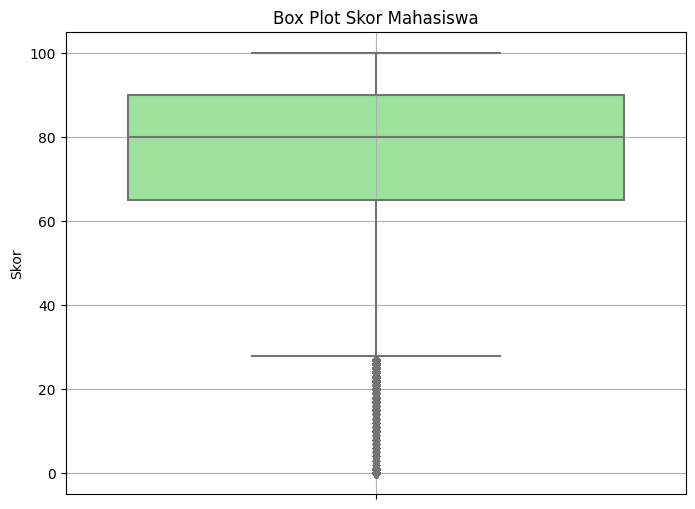

In [25]:
# distribusi skor dan mendeteksi outlier.
plt.figure(figsize=(8, 6))
sns.boxplot(data=sa, y='score', color='lightgreen')
plt.title('Box Plot Skor Mahasiswa')
plt.ylabel('Skor')
plt.grid(True)
plt.show()

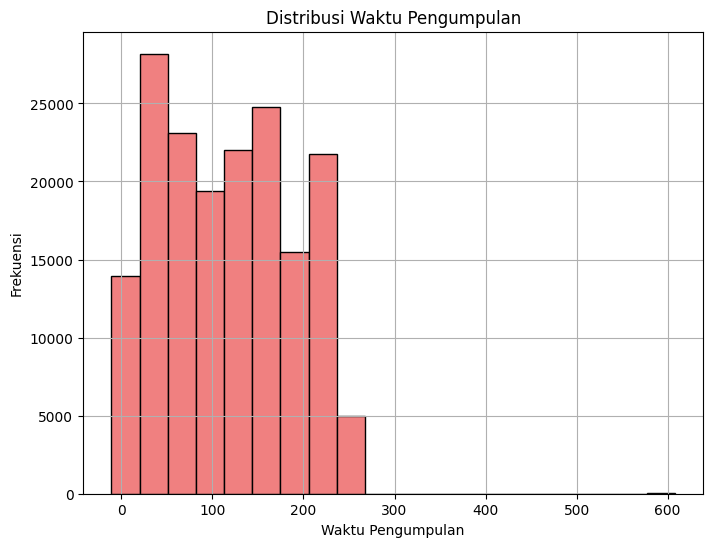

In [26]:
#  distribusi waktu pengumpulan.
plt.figure(figsize=(8, 6))
plt.hist(sa['date_submitted'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribusi Waktu Pengumpulan')
plt.xlabel('Waktu Pengumpulan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

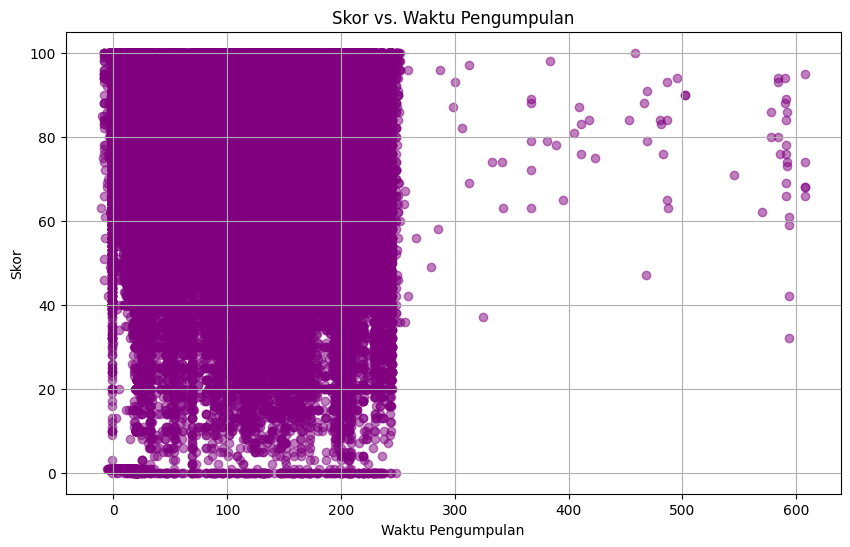

In [27]:
# korelasi antara waktu pengumpulan dan skor mahasiswa.
plt.figure(figsize=(10, 6))
plt.scatter(sa['date_submitted'], sa['score'], alpha=0.5, color='purple')
plt.title('Skor vs. Waktu Pengumpulan')
plt.xlabel('Waktu Pengumpulan')
plt.ylabel('Skor')
plt.grid(True)
plt.show()

# PROSES

In [34]:
print(merged_data.head(5))

   id_assessment  id_student  date_submitted  is_banked  score  date
0           1752       11391              18          0   78.0  19.0
1           1752       28400              22          0   70.0  19.0
2           1752       31604              17          0   72.0  19.0
3           1752       32885              26          0   69.0  19.0
4           1752       38053              19          0   79.0  19.0


In [35]:
print(merged_data.tail(5))

        id_assessment  id_student  date_submitted  is_banked  score   date
173734          37443      527538             227          0   60.0  229.0
173735          37443      534672             229          0  100.0  229.0
173736          37443      546286             215          0   80.0  229.0
173737          37443      546724             230          0  100.0  229.0
173738          37443      558486             224          0   80.0  229.0


In [36]:
# menggabungkan data dari kedua dataset berdasarkan kolom "id_assessment"
merged_data = pd.merge(sa, ass[['id_assessment', 'date']], on='id_assessment', how='left')
print(merged_data.head())

   id_assessment  id_student  date_submitted  is_banked  score  date
0           1752       11391              18          0   78.0  19.0
1           1752       28400              22          0   70.0  19.0
2           1752       31604              17          0   72.0  19.0
3           1752       32885              26          0   69.0  19.0
4           1752       38053              19          0   79.0  19.0


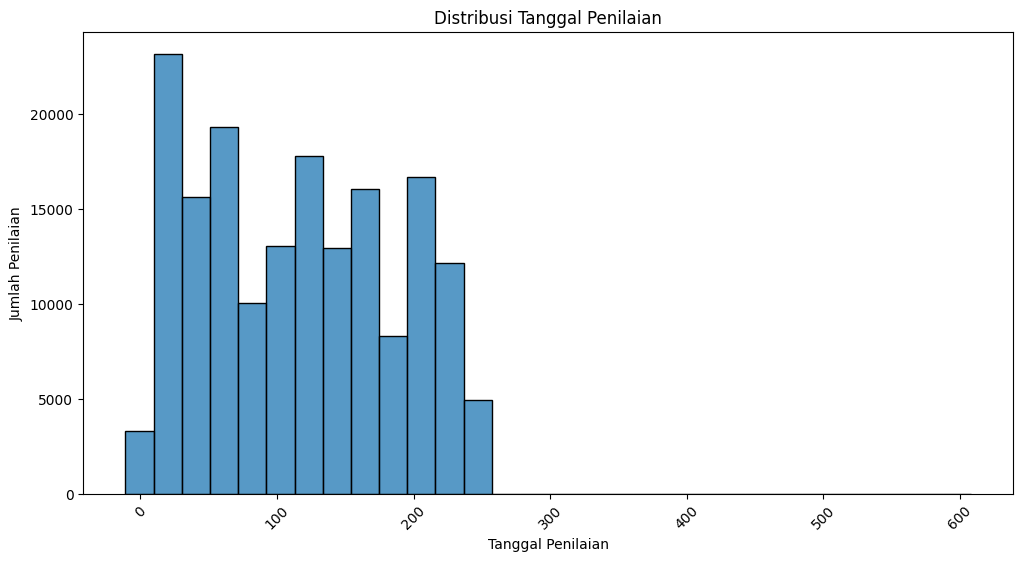

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='date_submitted', bins=30)
plt.title("Distribusi Tanggal Penilaian")
plt.xlabel("Tanggal Penilaian")
plt.ylabel("Jumlah Penilaian")
plt.xticks(rotation=45)
plt.show()


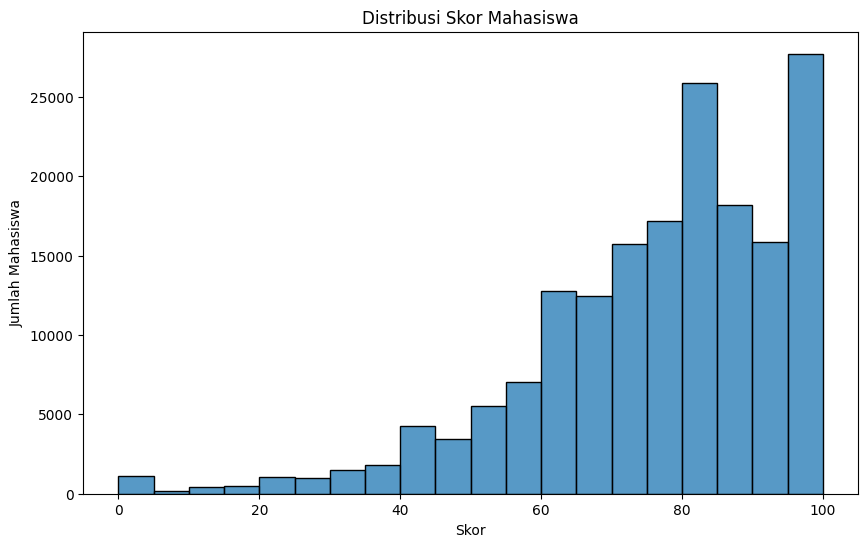

In [38]:
# EDA pada skor mahasiswa (score)
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='score', bins=20)
plt.title("Distribusi Skor Mahasiswa")
plt.xlabel("Skor")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

In [39]:
# memisahkan data berdasarkan jenis penilaian (TMA, Exam, CMA)
tma_data = ass[ass['assessment_type'] == 'TMA']
exam_data = ass[ass['assessment_type'] == 'Exam']
cma_data = ass[ass['assessment_type'] == 'CMA']

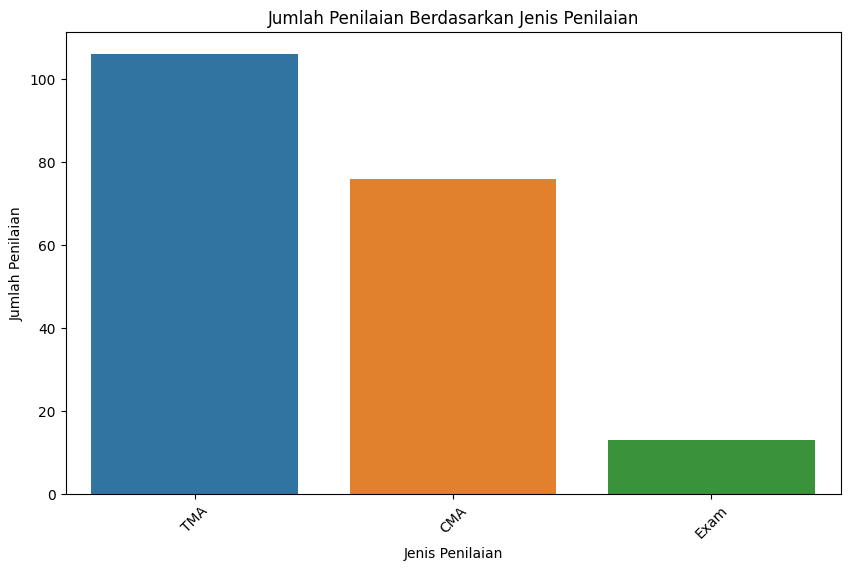

In [40]:
# Visualisasi jumlah penilaian berdasarkan jenis penilaian
plt.figure(figsize=(10, 6))
sns.countplot(data=ass, x='assessment_type')
plt.title("Jumlah Penilaian Berdasarkan Jenis Penilaian")
plt.xlabel("Jenis Penilaian")
plt.ylabel("Jumlah Penilaian")
plt.xticks(rotation=45)
plt.show()


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

merged_data.dropna(subset=['date', 'score'], inplace=True)

# Memisahkan fitur (X) dan target (y)
X = merged_data[['date']]
y = merged_data['score']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier dan melatihnya
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Memprediksi skor pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")



Korelasi antara Waktu Penilaian dan Skor Mahasiswa: 0.08
Korelasi positif
Semakin lama waktu penilaian, skor cenderung meningkat



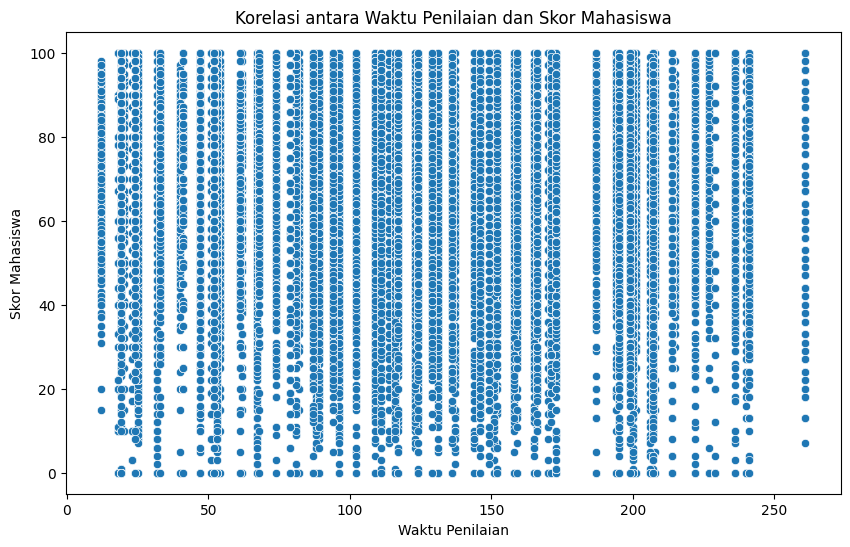

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Menghapus baris dengan nilai NaN
merged_data.dropna(subset=['date', 'score'], inplace=True)

# Menghitung korelasi antara waktu penilaian dan skor mahasiswa
correlation, _ = pearsonr(merged_data['date'], merged_data['score'])

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='date', y='score')
plt.title("Korelasi antara Waktu Penilaian dan Skor Mahasiswa")
plt.xlabel("Waktu Penilaian")
plt.ylabel("Skor Mahasiswa")

print(f"\nKorelasi antara Waktu Penilaian dan Skor Mahasiswa: {correlation:.2f}")

# Menambahkan keterangan berdasarkan hasil korelasi
if correlation > 0:
    plt.text(max(merged_data['date']) - 20, max(merged_data['score']) - 10, print("Korelasi positif"))
    plt.text(max(merged_data['date']) - 20, max(merged_data['score']) - 20, print("Semakin lama waktu penilaian, skor cenderung meningkat\n"))
elif correlation < 0:
    plt.text(max(merged_data['date']) - 20, max(merged_data['score']) - 10, print("Korelasi negatif"))
    plt.text(max(merged_data['date']) - 20, max(merged_data['score']) - 20, print("Semakin lama waktu penilaian, skor cenderung menurun\n"))
else:
    plt.text(max(merged_data['date']) - 20, max(merged_data['score']) - 10, print("Tidak ada korelasi yang signifikan"))

plt.show()
